**Feature-rich Network Analysis**: Analyze the interplay of node/edge attributes w.r.t. the modeled topology. Is it possible to observe relevant multiscale mixing patterns (i.e., using Conformity (https://github.com/GiulioRossetti/conformity) or other node-related measures (https://github.com/piratepeel/MultiscaleMixing) on subpopulations)? Do exist correla- tions, at the node level, between some topological attribute (e.g., clustering, centrality...) and the entropy/purity of the node’s neighborhood attributes?

In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from conformity import attribute_conformity
import powerlaw
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('data/edges.csv')#, usecols=[1, 2])

df.tail()

,Unnamed: 0,edge,count,source,target,source_class,target_class
466444,466444,zizu232 fancybeekeeper,1,zizu232,fancybeekeeper,entj,entj
466445,466445,znslattt fatafata12,1,znslattt,fatafata12,entp,entj
466446,466446,zoinks27 ravenpvff,1,zoinks27,ravenpvff,infp,infp
466447,466447,zu_capone kukdraws,1,zu_capone,kukdraws,infj,infj
466448,466448,zuqwaylh Kythoarr,1,zuqwaylh,Kythoarr,istp,enfp


In [3]:
df_class = pd.read_csv('data/author_class.csv', usecols=[1, 3])
df_class.head()

,author,i_or_e
0,cypranius,e
1,kikibiki,e
2,Kbnation,e
3,alistair373,i
4,coolerstuff10,e


In [4]:
flags = df_class.set_index('author')['i_or_e'].to_dict()

In [25]:
Graphtype = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df,source = 'source', target = 'target', edge_key='count',create_using=Graphtype)
nx.set_node_attributes(G, flags, "flag")    # add flag to graph

In [26]:
from collections import Counter
node_flags = nx.get_node_attributes(G, "flag")

flag_counts = Counter(node_flags.values())
flag_counts # total number of i and e

Counter({'i': 18999, 'e': 7810})


In [24]:
G.number_of_nodes()

26809

In [6]:
from conformity import attribute_conformity
alphas = [1., 2.5]

node_to_conformity = attribute_conformity(G, alphas, ['flag'], profile_size=1)


100%|██████████| 4718/4718 [00:43<00:00, 107.74it/s]


In [7]:
G.degree['washablememe']

1

In [15]:
# Create the merged dictionary
a='1.0'
merged_dict = {key: {'flag': flags[key], 'conformity': node_to_conformity[a]['flag'][key], 'degree': G.degree[key], 'clustering': nx.clustering(G, key)} for key in node_to_conformity[a]['flag']}

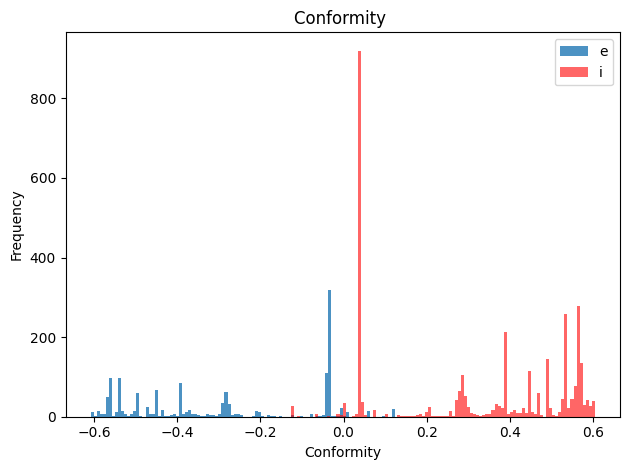

In [16]:
# Separate the conformity values based on the flag
conformity_e = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'e']
conformity_i = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'i']

# Histogram for 'e' flag
plt.hist(conformity_e, bins=100, label = 'e', alpha = 0.8)
plt.title("Conformity ")
plt.xlabel('Conformity')
plt.ylabel('Frequency')
plt.hist(conformity_i, bins=100, color='red', label ='i', alpha = 0.6)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [8]:
# Create the merged dictionary
a='2.5'
merged_dict = {key: {'flag': flags[key], 'conformity': node_to_conformity[a]['flag'][key], 'degree': G.degree[key], 'clustering': nx.clustering(G, key)} for key in node_to_conformity[a]['flag']}

In [9]:
merged_dict

{'tomjazzy': {'flag': 'i',
  'conformity': -0.14970158724327137,
  'degree': 2,
  'clustering': 0},
 'kittentp': {'flag': 'e',
  'conformity': -0.3995042213207459,
  'degree': 28,
  'clustering': 0.021164021164021163},
 'traeumereii': {'flag': 'i',
  'conformity': -0.10759113847674827,
  'degree': 1,
  'clustering': 0},
 'trvekvltmaster': {'flag': 'i',
  'conformity': -0.10759113847674827,
  'degree': 1,
  'clustering': 0},
 'twilightivity': {'flag': 'i',
  'conformity': -0.10759113847674827,
  'degree': 1,
  'clustering': 0},
 'uniquechild21': {'flag': 'i',
  'conformity': 0.2366375479957731,
  'degree': 4,
  'clustering': 0.5},
 'vHannibal': {'flag': 'i',
  'conformity': -0.14970158724327137,
  'degree': 2,
  'clustering': 0},
 'vedic1111': {'flag': 'i',
  'conformity': 0.24172388291878713,
  'degree': 4,
  'clustering': 0.5},
 'visibleconfusionwhat': {'flag': 'e',
  'conformity': 0.09744082256920239,
  'degree': 1,
  'clustering': 0},
 'voraciousflytrap': {'flag': 'i',
  'conformity

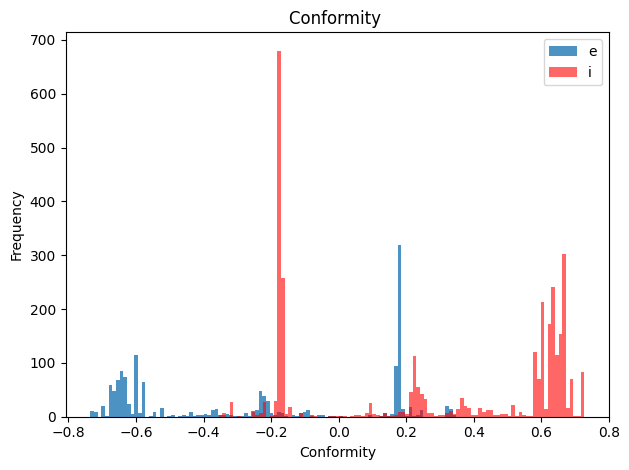

In [10]:
# Separate the conformity values based on the flag
conformity_e = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'e']
conformity_i = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'i']

# Histogram for 'e' flag
plt.hist(conformity_e, bins=100, label = 'e', alpha = 0.8)
plt.title("Conformity ")
plt.xlabel('Conformity')
plt.ylabel('Frequency')
plt.hist(conformity_i, bins=100, color='red', label ='i', alpha = 0.6)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

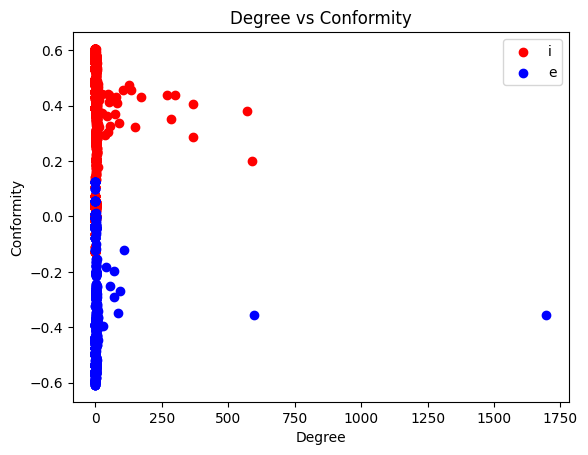

In [28]:
degrees_i = [info['degree'] for info in merged_dict.values() if info['flag'] == 'i']
conformities_i = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'i']

degrees_e = [info['degree'] for info in merged_dict.values() if info['flag'] == 'e']
conformities_e = [info['conformity'] for info in merged_dict.values() if info['flag'] == 'e']

plt.scatter(degrees_i, conformities_i, color='red', label="i")
plt.scatter(degrees_e, conformities_e, color='blue', label="e")
plt.title('Degree vs Conformity')
plt.xlabel('Degree')
plt.ylabel('Conformity')
#plt.loglog()
plt.legend()
plt.show()

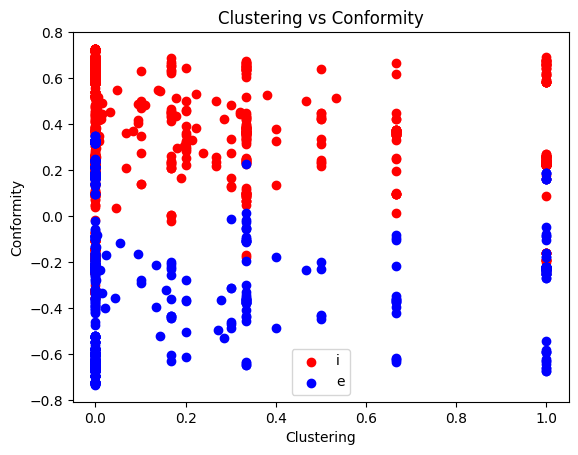

In [27]:
clustering_i = [info['clustering'] for info in merged_dict.values() if info['flag'] == 'i']
clustering_e = [info['clustering'] for info in merged_dict.values() if info['flag'] == 'e']

plt.scatter(clustering_i, conformities_i, color='red', label="i")
plt.scatter(clustering_e,conformities_e, color='blue', label="e")
plt.title('Clustering vs Conformity')
plt.xlabel('Clustering')
plt.ylabel('Conformity')
#plt.loglog()
plt.legend()
plt.show()